<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/Bank-account-usage-in-Kenya-Rwanda-Tanzania-and-Uganda-in-relation-to-related-demographic-factors/blob/master/Precy_Mae_Core_W2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Core W2 Independent Project**

## *1.* Defining the Question

**Research Question**

Figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


In order to work on the above problem, you need to do the following:

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

**Dataset** 

*   Variable Definitions: http://bit.ly/VariableDefinitions (Links to an external site.)
* Dataset: http://bit.ly/FinancialDataset (Links to an external site.) 

### a) Specifying the Question



 > Predict which individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



### b) Defining the Metric for Success
 

>*  Getting insights to factors that drive an individual's financial outcome.
*   Predict which individuals are likely to use a bank in the named countries.





### c) Understanding the context


### d) Recording the Experimental Design

















### e) Data Relevance


## *2.* Reading the Data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Read financial description dataset
money_desc= pd.read_csv("http://bit.ly/VariableDefinitions")
# Read financial dataset
money= pd.read_csv("http://bit.ly/FinancialDataset")

## *3.* Check the data


In [4]:
# Determining the no. of records in our description dataset
#
money_desc.shape

(12, 2)

In [5]:
# Determining the no. of records in our finance dataset
#
money.shape

(23524, 13)

In [6]:
# Preview dataset columns
money.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [7]:
# Previewing the top of our finance  dataset
#
money.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [8]:
# Previewing the bottom of our finance dataset
#
money.tail(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [9]:
# Checking whether each column has an appropriate datatype
#
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## *4.* External Source Validation

>Our measurements are in line with what has been recorded. We got our external source validation and confirmed our dataset from;


>1.   The 2019 FinAccess household survey by the CBK and KNBS https://fsdkenya.org/publication/finaccess2019/
2.   The FinScope Rwanda survey 2016 http://www.statistics.gov.rw/publication/finscope-rwanda-2016
3.   Finscope Tanzania 2017 http://www.fsdt.or.tz/finscope/
4.   Finscope Uganda 2018 http://fsduganda.or.ug/finscope-2018-survey-report/ 



## *5.* Tidying the Dataset


In [11]:
# Data cleaning procedures, fixing column names
#
money.columns= money.columns.str.strip().str.lower().str.replace(' ','_')
money.head(2)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


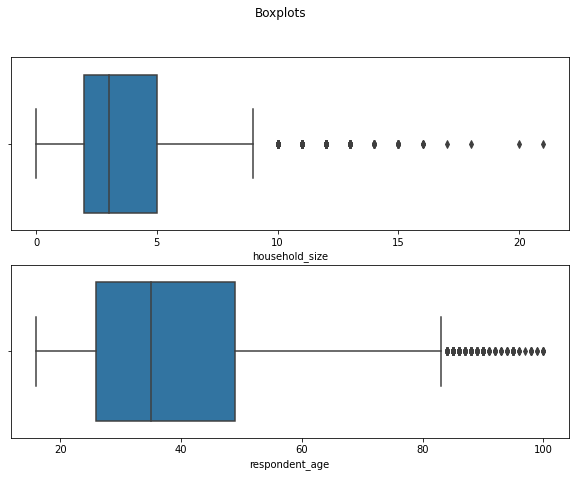

In [12]:
# Checking for outliers
fig, ((ax1), (ax2)) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(money['household_size'], ax=ax1)
sns.boxplot(money['respondent_age'], ax=ax2)
plt.show()
# The household size has seven outliers above the maximum upto more than 20
# The respondent age has has outliers as well above the maximum.

In [13]:
# Checking for Anomalies using Interquartile range
#
q1_age = money['respondent_age'].quantile(.25)
q3_age = money['respondent_age'].quantile(.75)

iqr_age = q3_age - q1_age

q1_house = money['household_size'].quantile(.25)
q3_house = money['household_size'].quantile(.75)

iqr_house = q3_house - q1_house
print(iqr_age,iqr_house)

# 50% of the respondent age data lies in the IQR of 23
# 50% of the household size data lies in the IQR of 3

23.0 3.0


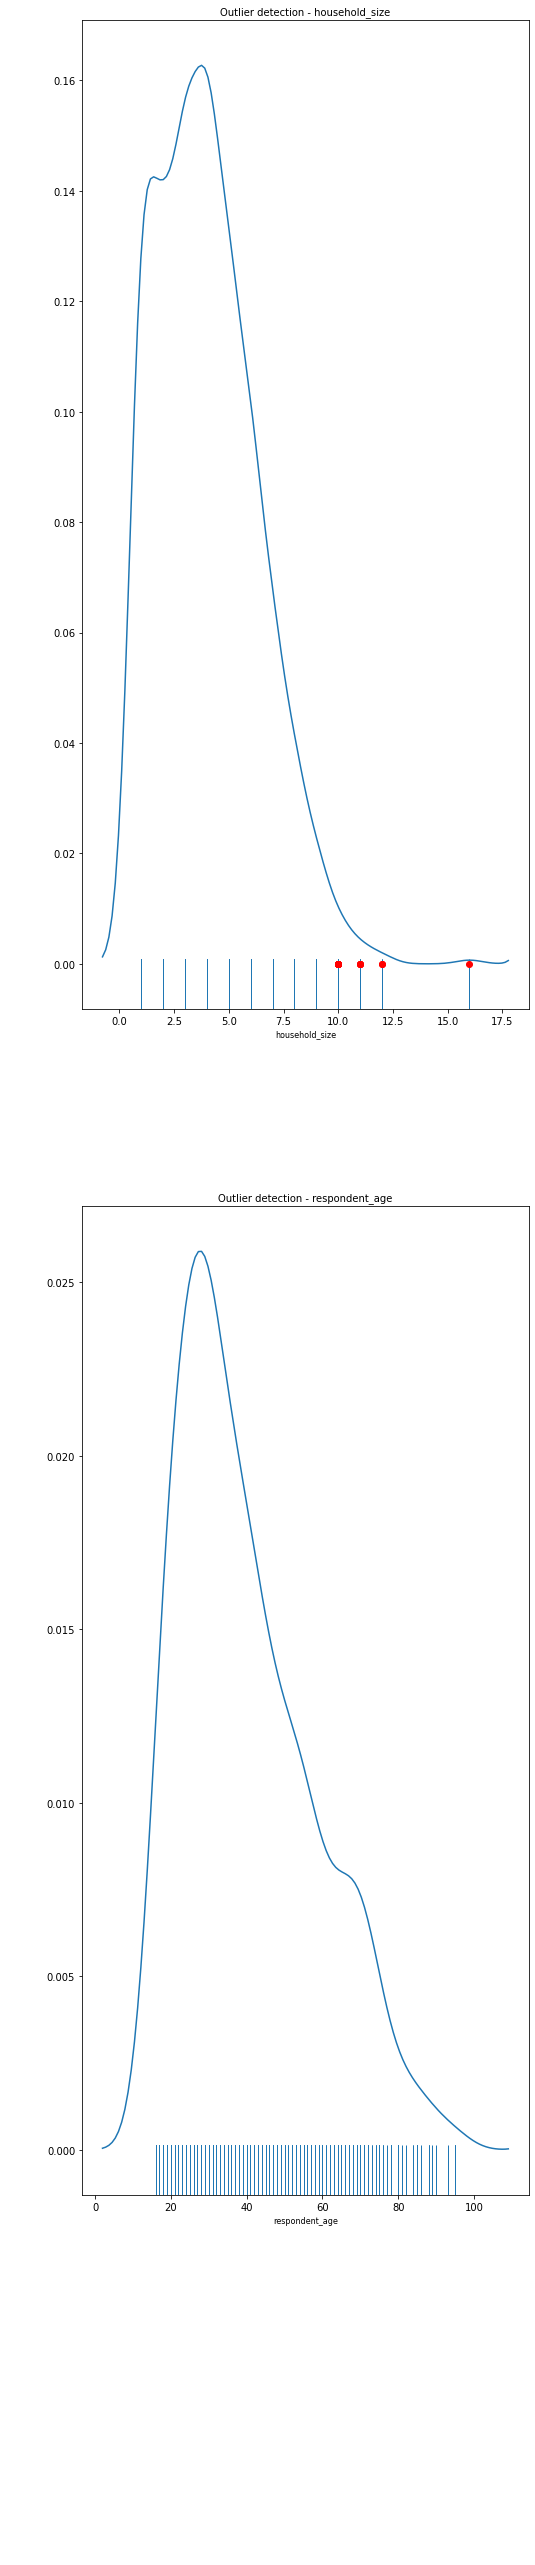

In [16]:
# Removing outliers using percentile based outlier removal
def percentile_based_outlier(money, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(money, [diff, 100 - diff])
    return (money < minval) | (money > maxval)

col_names = ['household_size','respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = money [col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()
# The values marked with a dot below in the x-axis of the graph have been removed from the column based on the set threshold percentile.

In [17]:
# Identifying the Missing Data
money.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [18]:
# Dealing with missing data
money.dropna().head(3)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


## *6.* Exploratory Analysis




In [19]:
# Ploting the univariate summaries and recording our observations
#
money.describe()

,year,household_size,respondent_age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


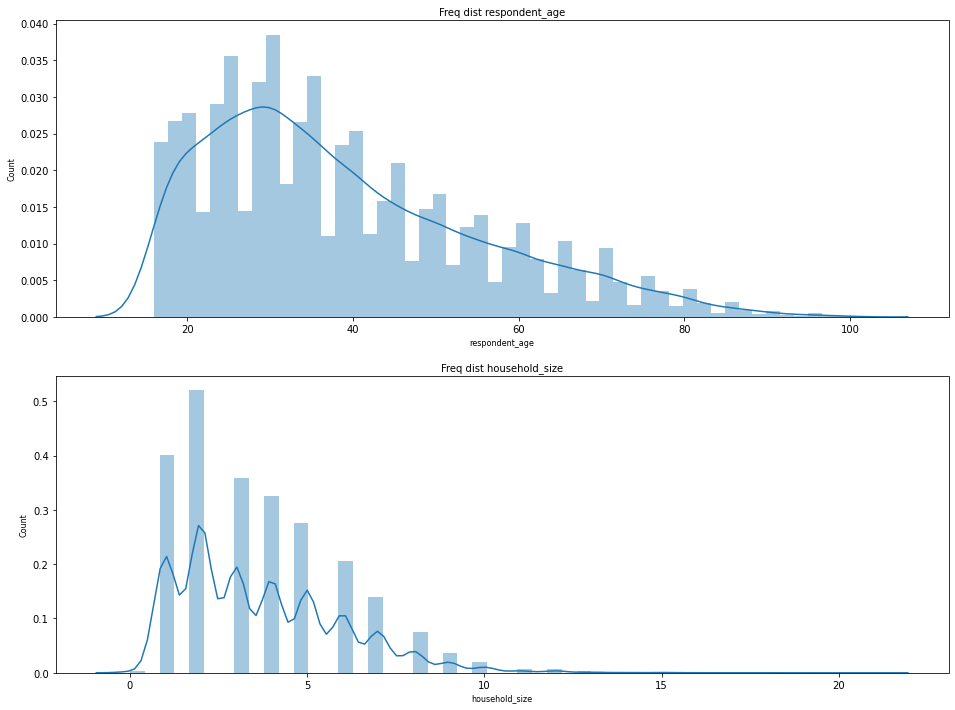

In [22]:
# Bivariate distribution plots
col_names = ['respondent_age','household_size']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(money[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
# Both the respondent age and household size are positively skewed 

In [ ]:
# Kurtosis
age= money['respondent_age'].kurt()
size=money['household_size'].kurt()
#
print(age,size)
# Household size has a kurtosis greater than 0 therefore it is a leptokurtic kurtosis, which is a peaked kurtosis
# Respondent age has a kurtosis lower than 0 therefore it is a platykurtic kurtosis, which is not peaked.

0.10110811880734305 1.1581542795310726


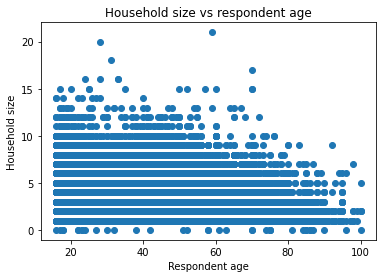

In [ ]:
# Plotting our scatterplot
plt.scatter(money ['respondent_age'], money['household_size'])
# Giving our scatterplot a title
plt.title('Household size vs respondent age')

# Labelling our x axis
plt.xlabel('Respondent age')

# Labelling our y axis
plt.ylabel('Household size')

# Displaying our scatterplot
plt.show()

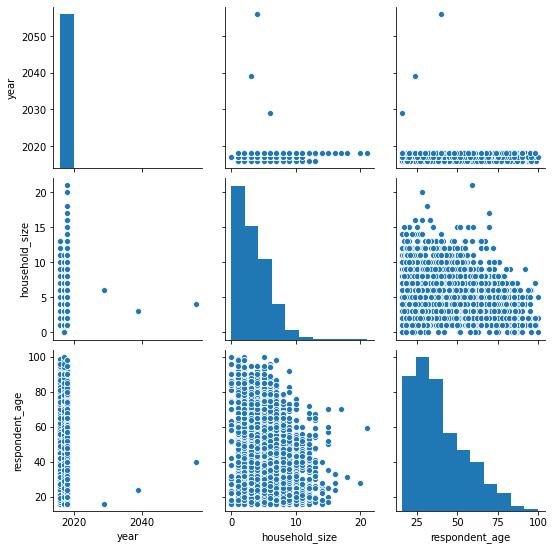

In [20]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(money)
plt.show()

In [ ]:
# Correlation
pearson_coeff = money["household_size"].corr(money["respondent_age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = money["household_size"].corr(money["respondent_age"]) 
print(coeff)
# Theres a weak negative correlation between household size and respondent age

-0.11970929714642328
-0.11970929714642328


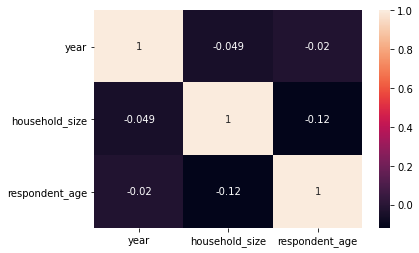

In [30]:
sns.heatmap(money.corr(),annot=True)
plt.show()
# we don’t see any attributes to be correlated and 
#the diagonal elements of the matrix value are always 1 as we are finding the correlation between the same columns 
#thus the inference here is
# There are no correlated variables this means that all the numerical attributes are important and needs to be considered for building the model

#### Data reduction technique;  **Factor Analysis**

In [ ]:
# Dropping unnecessary columns 
# 
dfa= money.drop(['country','year','uniqueid','has_a_bank_account','type_of_location','cell_phone_access','gender_of_respondent','the_relathip_with_head','marital_status','level_of_educuation','type_of_job'],axis=1,inplace=True)
dfa

In [31]:
# Bartlet test to measure suitability for factor analysis
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(money)
chi_square_value, p_value
# As shown below our data meets the factor analyser recquirement

(412.31650116415904, 2.436050439655479e-47)

In [42]:
# Choosing the number of factors using The Kaiser rule to drop all components with eigenvalues under 1.0
# 
from factor_analyzer import FactorAnalyzer
# Creating factor analysis object
fa = FactorAnalyzer()
fa.analyze(money, 3, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
# Here we have 2 eigen factors greater than 1 
# I will therefore choose 2 factors

,Original_Eigenvalues
0,1.123362
1,1.013575
2,0.863063


In [43]:
# Performing factor analysis 
fa = FactorAnalyzer()
fa.analyze(money, 2, rotation="varimax")
fa.loadings
# Only factor 1 do not meet the absolute 0.4 cutoff.
# Factor 2 has no high loading therefore we'll only take 1 factor

,Factor1,Factor2
year,0.004919,0.267913
household_size,-0.360314,-0.177400
respondent_age,0.370621,-0.079468


In [45]:
# Create factor analysis object and perform factor analysis using 1 factors
fa = FactorAnalyzer()
fa.analyze(money, 1, rotation="varimax")
fa.loadings

/usr/local/lib/python3.6/dist-packages/factor_analyzer/factor_analyzer.py:770: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


,Factor1
year,0.046444
household_size,-0.997635
respondent_age,0.118563


In [46]:
#Getting variance of my factor
# 
fa.get_factor_variance()

# Noting total 99% cumulative Variance explained by factor 1.

,Factor1
SS Loadings,1.011491
Proportion Var,0.337164
Cumulative Var,0.337164


**Why did I choose to use factor analysis?** 


*   My dataset has socio-economic data which work best with factor analysis
*   I have been able to reduce dimension with a factor which explains a high percentage of the cummulative variance



## *7.* Implementing the Solution

In [69]:
# Reviewing the Solution 
# Predict which individuals are most likely to have or use a bank account in 
# Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

df1 = money.groupby('household_size')['country'].count().sort_values(ascending= False)
df1.head(3)
y=df1.reset_index()
y.head(5)
#The household size with a household size of 2 has the most recorded bank accounts

,household_size,country
0,2.0,5127
1,1.0,3962
2,3.0,3531
3,4.0,3211
4,5.0,2727


## *8.* Challenging the solution

In [ ]:
# Reviewing the solution


## *9.*Follow up Questions

### a). Did we have the right data?

> Our data was right but incomplete because we did not have variables reflecting the number of accounts per lets say household



### b). Do we need other data to answer our question?

> We will need other data to properly answer my question. Data that shows the number of accounts per household

###c). Did we have the right question?

> The research question is right but we would need more data to effectively answer it